![](files/images/EscUpmPolit_p.gif "UPM")

## Imports

In [1]:
import pandas as pd
import csv
import numpy as np
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Reading data

In [2]:
dtype_list=pickle.load(open('type/train_clean_features.pkl','rb'))
df=pd.read_csv('dataset/train_data_clean_features.csv',dtype=dtype_list,nrows=100000)

In [3]:
pd.set_option('display.max_columns', None)
df

,label,slot_id,app_first_class,app_second_class,age,city_rank,device_size,net_type,app_score,emui_dev,list_time,device_price,consume_purchase,communication_avgonline_30d,pt_d,gender_2,gender_3,gender_4,city_-128,city_-127,city_-126,city_-125,city_-124,city_-123,city_-122,city_-121,city_-120,city_-119,city_-118,city_-117,city_-116,city_-115,city_-114,city_-113,city_-112,city_-111,city_-110,city_-109,city_-108,city_-107,city_-106,city_-105,city_-104,city_-103,city_-102,city_-101,city_-100,city_-99,city_-98,city_-97,city_-96,city_-95,city_-94,city_-93,city_-92,city_-91,city_-90,city_-89,city_-88,city_-87,city_-86,city_-85,city_-84,city_-83,city_-82,city_-81,city_-80,city_-79,city_-78,city_-77,city_-76,city_-75,city_-74,city_-73,city_-72,city_-71,city_-70,city_-69,city_-68,city_-67,city_-66,city_-65,city_-64,city_-63,city_-62,city_-61,city_-60,city_-59,city_-58,city_-57,city_-56,city_-55,city_-54,city_-53,city_-52,city_-51,city_-50,city_-49,city_-48,city_-47,city_-46,city_-45,city_-44,city_-43,city_-42,city_-41,city_-40,city_-39,city_-38,city_-37,city_-36,city_-35,city_-34,city_-33,city_-32,city_-31,city_-30,city_-29,city_-28,city_-27,city_-26,city_-25,city_-24,city_-23,city_-22,city_-21,city_-20,city_-19,city_-18,city_-17,city_-16,city_-15,city_-14,city_-13,city_-12,city_-11,city_-10,city_-9,city_-8,city_-7,city_-6,city_-5,city_-4,city_-3,city_-2,city_-1,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,city_11,city_12,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22,city_23,city_24,city_25,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,city_75,city_76,city_77,city_78,city_79,city_80,city_81,city_82,city_83,city_84,city_85,city_86,city_87,city_88,city_89,city_90,city_91,city_92,city_93,city_94,city_95,city_96,city_97,city_98,city_99,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,city_108,city_109,city_110,city_111,city_112,city_113,city_114,city_115,city_116,city_117,city_118,city_119,city_120,city_121,city_122,city_123,city_124,city_125,city_126,city_127,career_2,career_3,career_4,career_5,career_6,career_7,career_8,career_9,career_10,residence_12,residence_13,residence_14,residence_15,residence_16,residence_17,residence_18,residence_19,residence_20,residence_21,residence_22,residence_23,residence_24,residence_25,residence_26,residence_27,residence_28,residence_29,residence_30,residence_31,residence_32,residence_33,residence_34,residence_35,residence_36,residence_37,residence_38,residence_39,residence_40,residence_41,residence_42,residence_43,residence_44,residence_45,residence_46,device_name_12,device_name_13,device_name_14,device_name_15,device_name_16,device_name_17,device_name_18,device_name_19,device_name_20,device_name_21,device_name_22,device_name_23,device_name_24,device_name_25,device_name_26,device_name_27,device_name_28,device_name_29,device_name_30,device_name_31,device_name_32,device_name_33,device_name_34,device_name_35,device_name_36,device_name_37,device_name_38,device_name_39,device_name_40,device_name_41,device_name_42,device_name_43,device_name_44,device_name_45,device_name_46,device_name_47,device_name_48,device_name_49,device_name_50,device_name_51,device_name_52,device_name_53,device_name_54,device_name_56,device_name_57,device_name_58,device_name_59,device_name_60,device_name_61,device_name_63,device_name_64,device_name_65,device_name_66,device_name_67,device_name_68,device_name_69,device_name_70,device_name_71,device_name_72,device_name_73,device_name_74,device_name_75,device_name_76,device_name_77,device_name_78,device_name_79,device_name_80,device_name_81,device_name_82,device_name_

## Obtain X & Y

In [4]:
x = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']
y=np.array(y).ravel()

## Standard

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)


## Classifier

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVR

In [13]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1)

Solver =  newton-cg
[[9239 6006]
 [5677 9078]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61     15245
           1       0.60      0.62      0.61     14755

    accuracy                           0.61     30000
   macro avg       0.61      0.61      0.61     30000
weighted avg       0.61      0.61      0.61     30000

Solver =  lbfgs
[[9230 6015]
 [5673 9082]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61     15245
           1       0.60      0.62      0.61     14755

    accuracy                           0.61     30000
   macro avg       0.61      0.61      0.61     30000
weighted avg       0.61      0.61      0.61     30000

Solver =  liblinear
[[9238 6007]
 [5677 9078]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61     15245
           1       0.60      0.62      0.61     14755

    accuracy                           0.61  

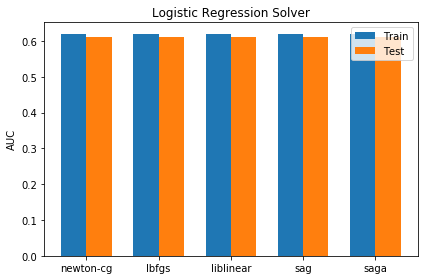

In [14]:
S=['newton-cg', 'lbfgs', 'liblinear','sag','saga']
auc_train=[]
auc_test=[]

for s in S:
    model = LogisticRegression(solver=s,max_iter=2000,C=5).fit(x_train,y_train)
    
    y_out_train = model.predict(x_train)
    y_out = model.predict(x_test)

    
    auc_train.append(roc_auc_score(y_train,y_out_train))
    auc_test.append(roc_auc_score(y_test,y_out))
    
    print('Solver = ',s)
    print(confusion_matrix(y_test, y_out))
    print(classification_report(y_test, y_out))
    
x = np.arange(len(S))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, auc_train, width, label='Train')
rects2 = ax.bar(x + width/2, auc_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('Logistic Regression Solver')
ax.set_xticks(x)
ax.set_xticklabels(S)
ax.legend()

fig.tight_layout()

plt.show()

In [11]:
K=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

auc_train=[]
auc_test=[]

for k in K:
    model = SVR(kernel=k,max_iter=2000,C=5).fit(x_train,y_train)
    
    y_out_train = model.predict(x_train)
    y_out = model.predict(x_test)

    
    auc_train.append(roc_auc_score(y_train,y_out_train))
    auc_test.append(roc_auc_score(y_test,y_out))
    
    print('K = ',k)
    print(confusion_matrix(y_test, y_out))
    print(classification_report(y_test, y_out))

x = np.arange(len(K))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, auc_train, width, label='Train')
rects2 = ax.bar(x + width/2, auc_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('SVM Kernel')
ax.set_xticks(x)
ax.set_xticklabels(K)
ax.legend()

fig.tight_layout()

plt.show()
        

C:\Users\jorge\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


K =  linear


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train,y_train)
    
y_out_train = model.predict(x_train)
y_out = model.predict(x_test)
    
print(confusion_matrix(y_test, y_out))
print(classification_report(y_test, y_out))
        

[[5723 4463]
 [4237 5577]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57     10186
           1       0.56      0.57      0.56      9814

    accuracy                           0.56     20000
   macro avg       0.57      0.57      0.56     20000
weighted avg       0.57      0.56      0.57     20000



0        7
1        3
2        5
3        5
4        1
        ..
99995    3
99996    4
99997    7
99998    5
99999    3
Name: pt_d, Length: 100000, dtype: int8